# Examen Práctico
---

**Materia:** Optimización

**Parcial:** 3  


**Nombre del Estudiante:** Jesús Alberto Aréchiga Carrillo

**Fecha:** 08/diciembre/2025

## Descripción del Problema
Se ha realizado un experimento de laboratorio que ha generado un conjunto de datos ruidosos. Sabemos por teoría que el fenómeno físico sigue un **comportamiento exponencial** descrito por la siguiente ecuación:

$$f(x) = a \cdot e^{b \cdot x} + c$$

Sin embargo, desconocemos los valores reales de los coeficientes **$a$**, **$b$** y **$c$**.

**Objetivo:**
Generar un modelo de regresión utilizando el algoritmo de **Evolución Diferencial (Differential Evolution)** para encontrar los valores óptimos de $a, b, c$ que minimicen el error entre el modelo propuesto y los datos experimentales.

### Instrucciones:
1.  Cargar los datos del archivo `datos_examen.csv`.
2.  Completar la Función de Costo (MSE).
3.  Configurar los parámetros iniciales del DE faltantes
4.  Completar los operadores faltantes en el algoritmo de Evolución Diferencial (Mutación y Cruza).
5.  Ejecutar el algoritmo **Debes lograr un error en la función de costo (MSE) de por lo menos 0.0103**
6. Analizar la gráfica de ajuste y de convergencia, las cuales deben tener un comportamiento similar al siguiente ejemplo:



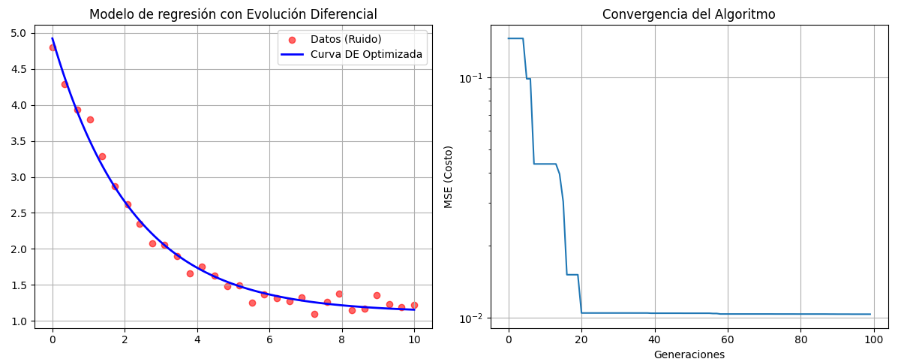

### Importación de Librerías y Carga de Datos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga los datos del examen
#AGREGA TU CÓDIGO AQUÍ
df = pd.read_csv('datos_examen.csv')
x_data = df['x'].values
y_data = df['y'].values

print("Datos cargados correctamente.")
print(f"Total de puntos: {len(x_data)}")
print(x_data) # Descomentar para ver los datos

Datos cargados correctamente.
Total de puntos: 30
[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]


### Visualización de los datos que se deben modelar (ajustar)

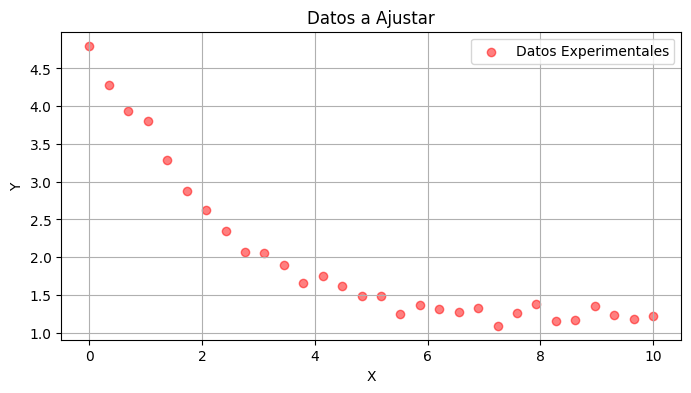

In [8]:
# Visualización de los datos problema
plt.figure(figsize=(8, 4))
plt.scatter(x_data, y_data, color='red', label='Datos Experimentales', alpha=0.5)
plt.title("Datos a Ajustar")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

### Definición del modelo

In [9]:
def modelo_exponencial(params, x):
    """
    Modelo: y = a * e^(b*x) + c
    params: lista o array [a, b, c]
    """
    a, b, c = params
    return a * np.exp(b * x) + c

### Función objetivo

In [10]:
def funcion_objetivo(params, x, y_real):
    """
    Calcula el Error Cuadrático Medio entre el modelo y los datos reales.
    """
    y_pred = modelo_exponencial(params, x)
    mse = np.mean((y_real - y_pred) ** 2)
    return mse

### Algoritmo DE

In [11]:
def evolucion_diferencial(bounds, pop_size, mutation_factor, crossover_rate, generations):
    """
    Implementación de DE/rand/1/bin
    bounds: Lista de tuplas [(min, max), ...] para cada variable
    """
    dim = len(bounds)

    # Inicialización de la población
    population = np.random.rand(pop_size, dim)
    min_b = np.array([b[0] for b in bounds])
    max_b = np.array([b[1] for b in bounds])
    diff = max_b - min_b

    # Escalar población al rango real
    population = min_b + population * diff

    # Evaluación inicial
    fitness = np.array([funcion_objetivo(ind, x_data, y_data) for ind in population])

    # Guardar el mejor histórico
    best_idx = np.argmin(fitness)
    best_vector = population[best_idx]
    best_score = fitness[best_idx]
    history = []

    # Ciclo principal (Generaciones)
    for gen in range(generations):
        for i in range(pop_size):
            # --- SELECCIÓN DE INDIVIDUOS (Mutación) ---
            # Elegir 3 índices aleatorios distintos a i
            idxs = [idx for idx in range(pop_size) if idx != i]
            a, b, c = population[np.random.choice(idxs, 3, replace=False)]

            # Crea el vector mutante (v) = a + F * (b - c)
            mutant = a + mutation_factor * (b - c)

            # Clipping (Mantener dentro de los límites)
            mutant = np.clip(mutant, min_b, max_b)

            # --- CRUCE (Crossover) ---
            # Crea el vector de prueba (trial) mezclando target y mutant
            cross_points = np.random.rand(dim) < crossover_rate

            if not np.any(cross_points): # Asegurar al menos un cambio
                cross_points[np.random.randint(0, dim)] = True

            trial = np.where(cross_points, mutant, population[i])

            # --- SELECCIÓN (Supervivencia) ---
            trial_fitness = funcion_objetivo(trial, x_data, y_data)

            if trial_fitness < fitness[i]:
                population[i] = trial
                fitness[i] = trial_fitness

                # Actualizar mejor global si aplica
                if trial_fitness < best_score:
                    best_score = trial_fitness
                    best_vector = trial

        history.append(best_score)
        if gen % 10 == 0:
            print(f"Gen {gen}: Mejor MSE = {best_score:.5f}: Mejor solución = {best_vector}")

    return best_vector, best_score, history

### Configuración de los parámetros iniciales del DE

In [12]:
# Límites de búsqueda: a, b, c: a entre [0, 10], b entre [-2, 0] (asumiendo decaimiento), c entre [0, 5]
bounds = [(0, 10), (-2, 0.5), (0, 5)]
#Configura los parámetros iniciales
mutation_factor = 0.8
crossover_rate = 0.9
generations = 100

### Ejecución: búsqueda de los parámetros óptimos del problema

In [13]:
mejor_solucion, mejor_error, historial = evolucion_diferencial(bounds=bounds, pop_size=5,
                                                               mutation_factor=mutation_factor,
                                                               crossover_rate=crossover_rate, generations=generations)

print("\n--- RESULTADOS ---")
print(f"Mejores Parámetros encontrados: a={mejor_solucion[0]:.4f}, b={mejor_solucion[1]:.4f}, c={mejor_solucion[2]:.4f}")
print(f"Error Final (MSE): {mejor_error:.5f}")

Gen 0: Mejor MSE = 0.24495: Mejor solución = [ 3.69780175 -0.15091659  0.3912885 ]
Gen 10: Mejor MSE = 0.04259: Mejor solución = [ 3.45690715 -0.45073349  1.04017591]
Gen 20: Mejor MSE = 0.01760: Mejor solución = [ 3.74369207 -0.53469838  1.26890728]
Gen 30: Mejor MSE = 0.01095: Mejor solución = [ 3.73949486 -0.43327419  1.10347378]
Gen 40: Mejor MSE = 0.01066: Mejor solución = [ 3.81088308 -0.4355434   1.08034843]
Gen 50: Mejor MSE = 0.01063: Mejor solución = [ 3.82971599 -0.43762537  1.08413   ]
Gen 60: Mejor MSE = 0.01056: Mejor solución = [ 3.81777299 -0.43966406  1.08451497]
Gen 70: Mejor MSE = 0.01056: Mejor solución = [ 3.82004234 -0.43966047  1.08453826]
Gen 80: Mejor MSE = 0.01056: Mejor solución = [ 3.81856082 -0.43971327  1.0845766 ]
Gen 90: Mejor MSE = 0.01056: Mejor solución = [ 3.81957174 -0.4397844   1.08458562]

--- RESULTADOS ---
Mejores Parámetros encontrados: a=3.8195, b=-0.4398, c=1.0846
Error Final (MSE): 0.01056


### Modelo de regresión y gráfica de convergencia

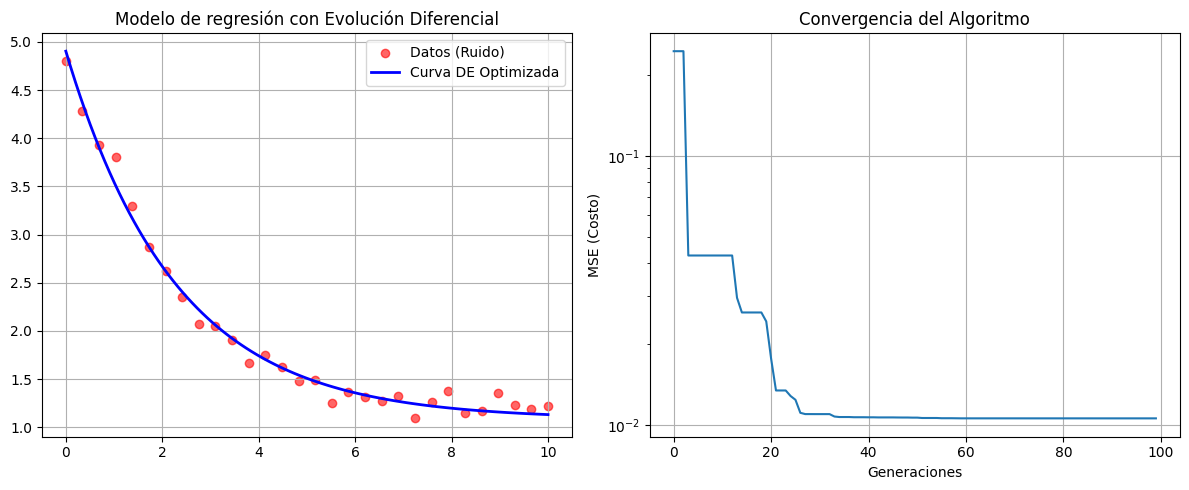

In [14]:
# Gráfica 1: Modelo de regresión (ajuste de curva)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, color='red', label='Datos (Ruido)', alpha=0.6)
x_plot = np.linspace(0, 10, 100)
y_plot = modelo_exponencial(mejor_solucion, x_plot)
plt.plot(x_plot, y_plot, color='blue', linewidth=2, label='Curva DE Optimizada')
plt.title("Modelo de regresión con Evolución Diferencial")
plt.legend()
plt.grid(True)

# Gráfica 2: Convergencia
plt.subplot(1, 2, 2)
plt.plot(historial)
plt.title("Convergencia del Algoritmo")
plt.xlabel("Generaciones")
plt.ylabel("MSE (Costo)")
plt.yscale('log') # Escala logarítmica para ver mejor los detalles
plt.grid(True)

plt.tight_layout()
plt.show()